In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# read data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# посмотрим на данные. На признаки (фичи) некие сущности, которые описывает объекты в данных
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# категориальные фичи

In [2]:
# удалю непрерывные фичи из датафрейма

cont_feutures = ['PassengerId', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Fare']
train_df.drop(cont_feutures, axis=1, inplace=True)  # inplace=True - удаляет фичи из датафрейма

In [3]:
train_df.head()

,Survived,Sex,Ticket,Cabin,Embarked
0,0,male,A/5 21171,NaN,S
1,1,female,PC 17599,C85,C
2,1,female,STON/O2. 3101282,NaN,S
3,1,female,113803,C123,S
4,0,male,373450,NaN,S


In [5]:
train_df.info() # видно типы, и не нулевые значения

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  891 non-null    int64 
 1   Sex       891 non-null    object
 2   Ticket    891 non-null    object
 3   Cabin     204 non-null    object
 4   Embarked  889 non-null    object
dtypes: int64(1), object(4)
memory usage: 34.9+ KB


In [14]:
# есть ли взаимосвязь между целевым признаком(выживание) и была ли у пассажира отдельня каюта
# разделю датасет на две группы True отображает пассажиров у которых отсутсвует упонимание о каюте
#  False - у которых 0 значения в поле каюта отсутсвуют
#  True запись о каюте  отсутсвует,  False - запись о каюте присутсвует
# те у кого запись о каюте была, выживаемость выше. Значит этот признак важен
train_df.groupby(train_df['Cabin'].isnull()).mean(numeric_only=True) # numeric_only=True - учитывает только числовые значения


,Survived
Cabin,
False,0.666667
True,0.299854


In [15]:
# если запись о кабине отсутсвует, то создаю новый признак Cabin_indicator и присваиваю ему значение 0, 
# если запись о кабине присутсвует, то присваиваю ему значение 1
train_df['Cabin_indicator'] = np.where(train_df['Cabin'].isnull(), 0, 1) # создаю новый признак
train_df.head(10)

,Survived,Sex,Ticket,Cabin,Embarked,Cabin_indicator
0,0,male,A/5 21171,NaN,S,0
1,1,female,PC 17599,C85,C,1
2,1,female,STON/O2. 3101282,NaN,S,0
3,1,female,113803,C123,S,1
4,0,male,373450,NaN,S,0
5,0,male,330877,NaN,Q,0
6,0,male,17463,E46,S,1
7,0,male,349909,NaN,S,0
8,1,female,347742,NaN,S,0
9,1,female,237736,NaN,C,0


<Figure size 640x480 with 0 Axes>

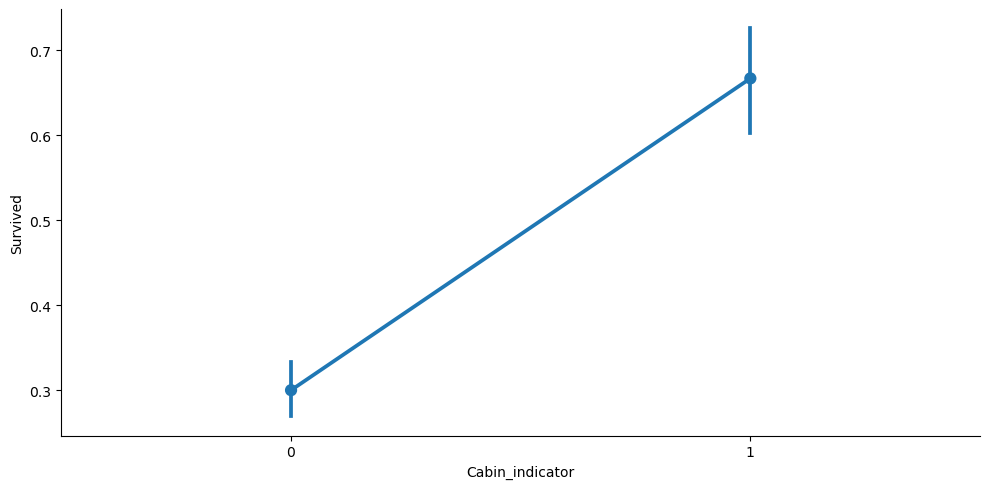

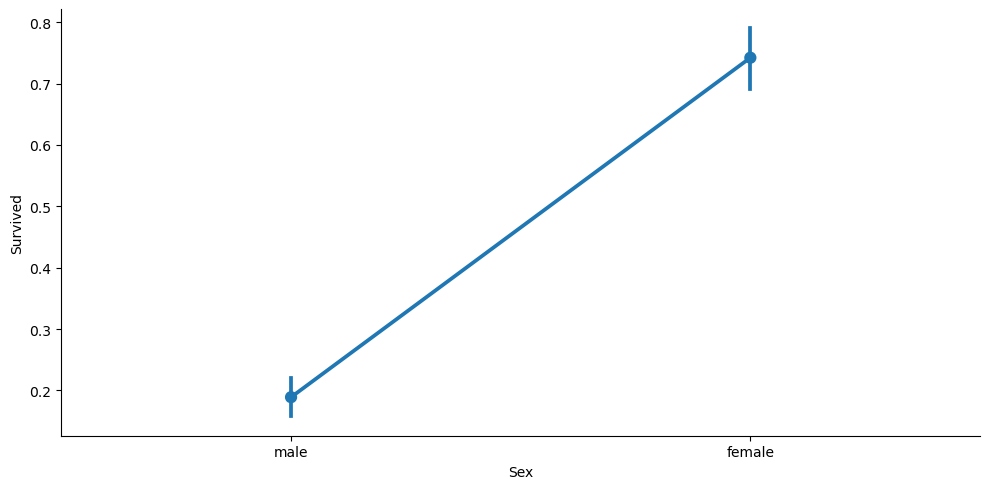

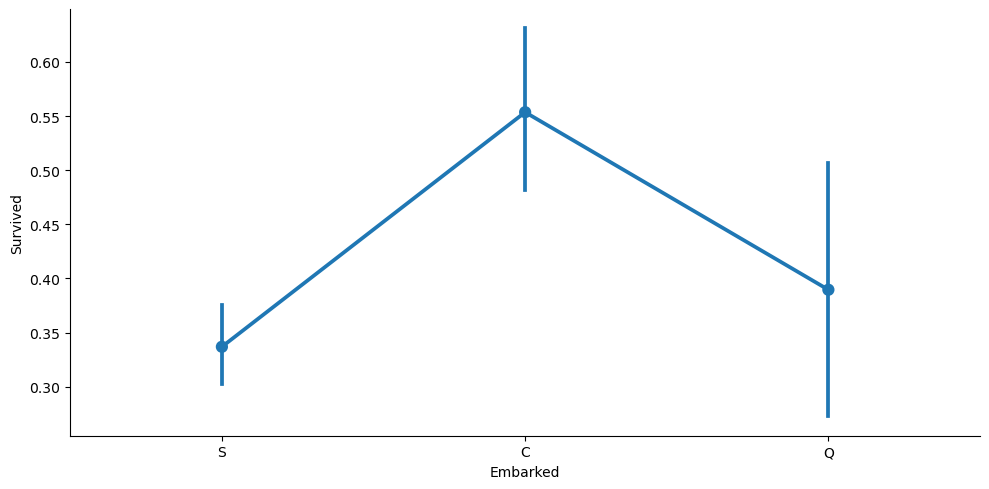

In [18]:
# попытаюсь графически отобразить cabin_indicator, sex, survived
for i, col in enumerate(['Cabin_indicator', 'Sex', 'Embarked']):
    plt.figure(i)
    sns.catplot(x=col, y='Survived', data=train_df, kind='point', aspect=2)

In [19]:
# pivot table сводники в каком порту поднялось сколько людей по полам
train_df.pivot_table('Survived', index='Sex', columns='Embarked', aggfunc='count')

Embarked,C,Q,S
Sex,,,
female,73,36,203
male,95,41,441


In [21]:
# видно что в городе S зашло много людей без каюты.
train_df.pivot_table('Survived', index='Cabin_indicator', columns='Embarked', aggfunc='count')


Embarked,C,Q,S
Cabin_indicator,,,
0,99,73,515
1,69,4,129


In [23]:


train_df.drop('Ticket', axis=1, inplace=True) # удаляю фичи Ticket так как они не влияют на выживаемость
train_df.head()

,Survived,Sex,Cabin,Embarked,Cabin_indicator
0,0,male,NaN,S,0
1,1,female,C85,C,1
2,1,female,NaN,S,0
3,1,female,C123,S,1
4,0,male,NaN,S,0


In [24]:
binary_gender = {'male': 0, 'female': 1} # создаю словарь

train_df['Sex'] = train_df['Sex'].map(binary_gender)


In [26]:
train_df.head()

,Survived,Sex,Cabin,Embarked,Cabin_indicator
0,0,0,NaN,S,0
1,1,1,C85,C,1
2,1,1,NaN,S,0
3,1,1,C123,S,1
4,0,0,NaN,S,0


In [27]:


train_df.drop(['Cabin', 'Embarked'], axis=1, inplace=True) # удаляю фичи Ticket так как они не влияют на выживаемость
train_df.head()

,Survived,Sex,Cabin_indicator
0,0,0,0
1,1,1,1
2,1,1,0
3,1,1,1
4,0,0,0
